<a href="https://colab.research.google.com/github/anshulpratap91/Python_ML_Codes/blob/main/BERT_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import os
import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow_text
import tensorflow_text as text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil

In [ ]:
#download IMDB dataset
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'
dataset = tf.keras.utils.get_file(fname="aclImdb_v1.tar.gz",origin=url,untar=True)

In [4]:
#load the dataset
dataset_dir = os.path.join(os.path.dirname(dataset),'aclImdb')
train_dir=os.path.join(dataset_dir,'train')
test_dir=os.path.join(dataset_dir,'test')

#remove unwanted directories 
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [5]:
#load hyperparameters
validation=0.2
seed=42
#create training dataset by loading text from train directory, training data set and validation dataset are split
raw_train_ds=tf.keras.utils.text_dataset_from_directory(train_dir,batch_size=32,validation_split=validation,seed=seed,subset='training')

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [6]:
#create validation data   
raw_val_ds=tf.keras.utils.text_dataset_from_directory(train_dir,subset='validation',validation_split=validation,seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [7]:
#create test dataset
raw_test_ds=tf.keras.utils.text_dataset_from_directory(test_dir)

Found 25000 files belonging to 2 classes.


In [8]:
#assign BERT model URLs 
bert_url='https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
preprocess_url='https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [9]:
#load preprocess and BERT model
bert_preprocess_model=hub.KerasLayer(preprocess_url,name='bert_preprocess')

In [10]:
bert_model=hub.KerasLayer(bert_url, name='bert_model')

In [11]:
  #create model architecture
  text_input = tf.keras.layers.Input(shape=(),name='input_layer',dtype=tf.string)
  preprocessed_text = bert_preprocess_model(text_input)
  output=bert_model(preprocessed_text)
  l = tf.keras.layers.Dropout(0.1,name='dropout')(output['pooled_output'])
  l=tf.keras.layers.Dense(1,activation='sigmoid',name='output')(l)

  model = tf.keras.Model(inputs=[text_input], outputs=[l])
  model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 bert_preprocess (KerasLayer)   {'input_mask': (Non  0           ['input_layer[0][0]']            
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [12]:
#define model optimizer and loss function
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

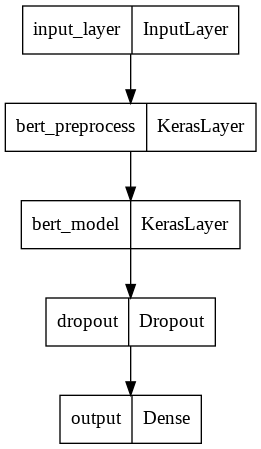

In [13]:
tf.keras.utils.plot_model(model)

In [14]:
#run the model for 3 epochs
model.fit(raw_test_ds,validation_data=raw_val_ds,epochs=3)

Epoch 1/3
782/782 [==============================] - 579s 725ms/step - loss: 0.6279 - accuracy: 0.6462 - val_loss: 0.5773 - val_accuracy: 0.7162
Epoch 2/3
782/782 [==============================] - 564s 721ms/step - loss: 0.5672 - accuracy: 0.7129 - val_loss: 0.5410 - val_accuracy: 0.7470
Epoch 3/3
782/782 [==============================] - 563s 720ms/step - loss: 0.5453 - accuracy: 0.7288 - val_loss: 0.5451 - val_accuracy: 0.7254


In [16]:
#calculate model loss and accuracy
loss,accuracy = model.evaluate(raw_test_ds)
print("loss :",loss)
print("accuracy:",accuracy)

782/782 [==============================] - 469s 600ms/step - loss: 0.5438 - accuracy: 0.7214
loss : 0.5437777638435364
accuracy: 0.7214400172233582
